# SemEval 2026 Task 2 — Exploratory Data Analysis (EDA)


In [1]:
import os
import sys
from pathlib import Path

# Find project root by walking up until we see a 'src' directory
project_root = Path().resolve()
while project_root != project_root.parent and not (project_root / "src").exists():
    project_root = project_root.parent

# Add project root to sys.path and set it as working directory
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
os.chdir(project_root)

print(f"Project root set to: {project_root}")

%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.data_loader import load_all_data, print_data_summary

plt.style.use("ggplot")

data = load_all_data()
print_data_summary(data)

subtask1 = data["subtask1"].copy()
subtask2a = data["subtask2a"].copy()
subtask2b = data["subtask2b"].copy()
subtask2b_detailed = data["subtask2b_detailed"].copy()
subtask2b_user = data["subtask2b_user"].copy()

subtask1.head()


Project root set to: /Users/araj/Documents/Code/Machine Learning/semeval-task2/semeval-2-emotion-dynamics
[subtask1] column 'valence' min=-2.0 max=2.0 (nan_count=0)
[subtask1] column 'arousal' min=0.0 max=2.0 (nan_count=0)
[subtask2a] column 'valence' min=-2.0 max=2.0 (nan_count=0)
[subtask2a] column 'arousal' min=0.0 max=2.0 (nan_count=0)
[subtask2a] column 'state_change_valence' min=-4.0 max=4.0 (nan_count=137)
[subtask2a] column 'state_change_arousal' min=-2.0 max=2.0 (nan_count=137)
[subtask2b] column 'valence' min=-2.0 max=2.0 (nan_count=0)
[subtask2b] column 'arousal' min=0.0 max=2.0 (nan_count=0)
[subtask2b] column 'disposition_change_valence' min=-3.666666666666667 max=2.916666666666667 (nan_count=0)
[subtask2b] column 'disposition_change_arousal' min=-2.0 max=2.0 (nan_count=0)
[subtask2b_detailed] column 'valence' min=-2.0 max=2.0 (nan_count=0)
[subtask2b_detailed] column 'arousal' min=0.0 max=2.0 (nan_count=0)
[subtask2b_detailed] column 'mean_valence_half1' min=-1.6363636363

,user_id,text_id,text,timestamp,collection_phase,is_words,valence,arousal
0,1,200,I feel good . I caught up on some sleep . Wo...,2021-06-09 12:41:57,1,False,2.0,1.0
1,1,201,I’ve been feeling good for days and days . I r...,2021-06-11 12:01:45,1,False,2.0,1.0
2,1,202,I’ve been feeling fine personally . I’ve been ...,2021-06-13 13:15:07,1,False,0.0,1.0
3,1,203,I feel great . I’ve had a day off . I’m going ...,2021-06-16 12:03:12,1,False,2.0,1.0
4,1,204,I feel great today . I am well rested . I have...,2021-06-17 12:38:38,1,False,2.0,2.0


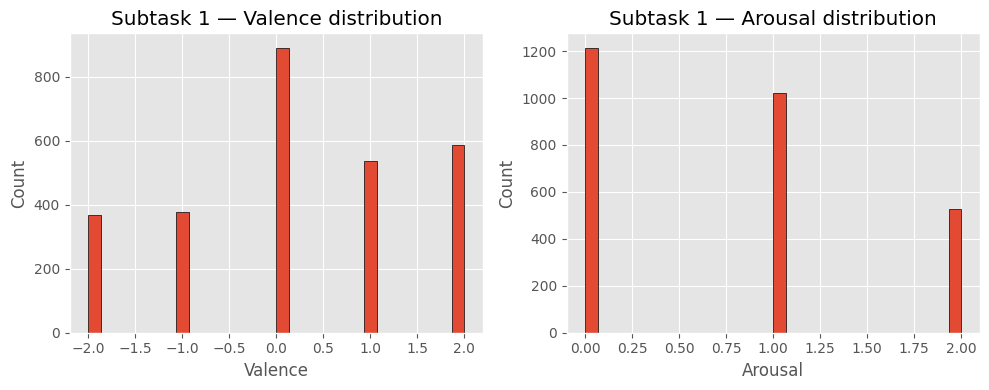

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(subtask1["valence"], bins=30, edgecolor="black")
axes[0].set_title("Subtask 1 — Valence distribution")
axes[0].set_xlabel("Valence")
axes[0].set_ylabel("Count")

axes[1].hist(subtask1["arousal"], bins=30, edgecolor="black")
axes[1].set_title("Subtask 1 — Arousal distribution")
axes[1].set_xlabel("Arousal")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [1]:
plt.figure(figsize=(5, 5))
plt.scatter(subtask1["valence"], subtask1["arousal"], alpha=0.2, s=5)
plt.title("Subtask 1 — Valence vs Arousal")
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.grid(True, alpha=0.3)
plt.show()


NameError: name 'plt' is not defined

Number of users: 137
count    137.000000
mean      20.175182
std       27.966602
min        2.000000
25%        7.000000
50%       14.000000
75%       20.000000
max      206.000000
Name: text_id, dtype: float64


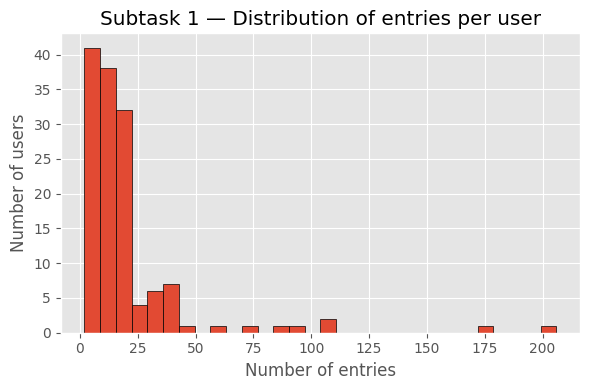

In [4]:
entries_per_user = subtask1.groupby("user_id")["text_id"].nunique()

print(f"Number of users: {entries_per_user.shape[0]}")
print(entries_per_user.describe())

plt.figure(figsize=(6, 4))
plt.hist(entries_per_user, bins=30, edgecolor="black")
plt.title("Subtask 1 — Distribution of entries per user")
plt.xlabel("Number of entries")
plt.ylabel("Number of users")
plt.tight_layout()
plt.show()


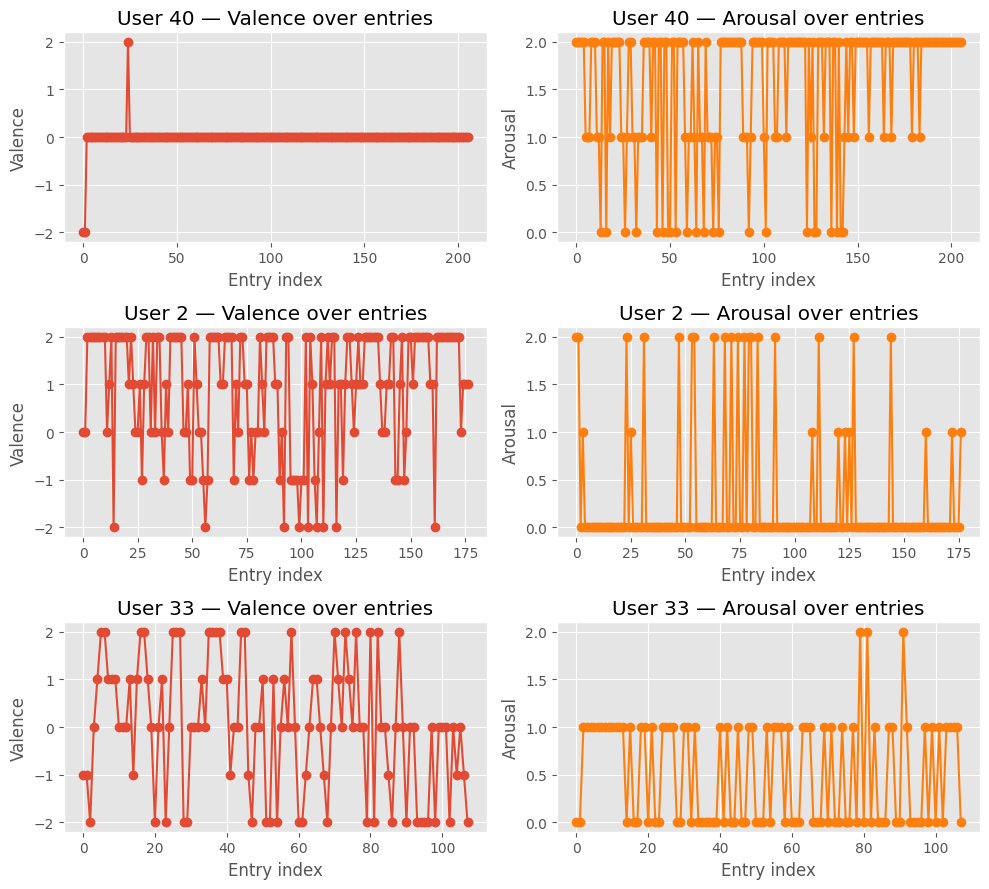

In [5]:
# ensure sorted by user and timestamp/index
subtask1_sorted = subtask1.sort_values(["user_id", "timestamp"])

example_user_ids = (
    subtask1_sorted["user_id"]
    .value_counts()
    .head(3)
    .index.tolist()
)

fig, axes = plt.subplots(len(example_user_ids), 2, figsize=(10, 3 * len(example_user_ids)), sharex=False)

if len(example_user_ids) == 1:
    axes = np.expand_dims(axes, axis=0)

for row_idx, uid in enumerate(example_user_ids):
    user_df = subtask1_sorted[subtask1_sorted["user_id"] == uid].reset_index(drop=True)
    x = np.arange(len(user_df))

    axes[row_idx, 0].plot(x, user_df["valence"], marker="o")
    axes[row_idx, 0].set_title(f"User {uid} — Valence over entries")
    axes[row_idx, 0].set_xlabel("Entry index")
    axes[row_idx, 0].set_ylabel("Valence")

    axes[row_idx, 1].plot(x, user_df["arousal"], marker="o", color="tab:orange")
    axes[row_idx, 1].set_title(f"User {uid} — Arousal over entries")
    axes[row_idx, 1].set_xlabel("Entry index")
    axes[row_idx, 1].set_ylabel("Arousal")

plt.tight_layout()
plt.show()


count    2764.000000
mean       32.906295
std        31.350532
min         5.000000
25%         9.000000
50%        11.000000
75%        52.000000
max       225.000000
Name: text_len_tokens, dtype: float64


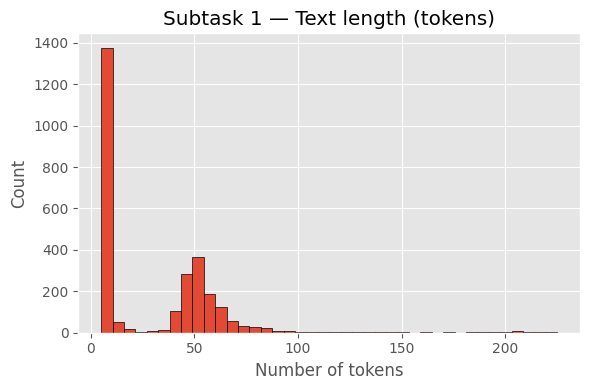

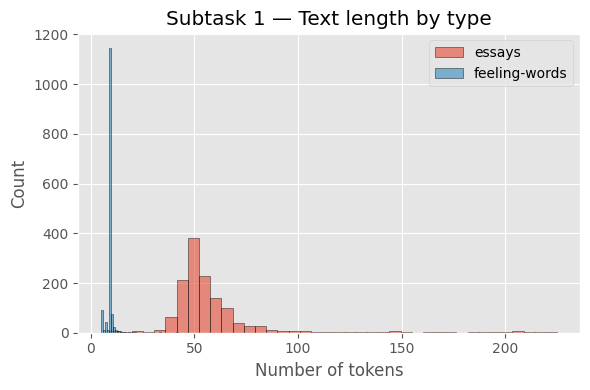

In [6]:
subtask1["text_len_tokens"] = subtask1["text"].astype(str).str.split().str.len()

print(subtask1["text_len_tokens"].describe())

plt.figure(figsize=(6, 4))
plt.hist(subtask1["text_len_tokens"], bins=40, edgecolor="black")
plt.title("Subtask 1 — Text length (tokens)")
plt.xlabel("Number of tokens")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

if "is_words" in subtask1.columns:
    essays = subtask1.loc[~subtask1["is_words"], "text_len_tokens"]
    words_only = subtask1.loc[subtask1["is_words"], "text_len_tokens"]

    plt.figure(figsize=(6, 4))
    plt.hist(essays, bins=40, alpha=0.6, label="essays", edgecolor="black")
    plt.hist(words_only, bins=40, alpha=0.6, label="feeling-words", edgecolor="black")
    plt.title("Subtask 1 — Text length by type")
    plt.xlabel("Number of tokens")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [7]:
for name, df in data.items():
    print(f"\n=== {name} ===")
    print(df.head(3))
    if set(["valence", "arousal"]).issubset(df.columns):
        print(df[["valence", "arousal"]].describe())
    else:
        print("(valence/arousal not present in this table)")



=== subtask1 ===
   user_id  text_id                                               text  \
0        1      200  I feel good .   I caught up on some sleep . Wo...   
1        1      201  I’ve been feeling good for days and days . I r...   
2        1      202  I’ve been feeling fine personally . I’ve been ...   

            timestamp  collection_phase  is_words  valence  arousal  
0 2021-06-09 12:41:57                 1     False      2.0      1.0  
1 2021-06-11 12:01:45                 1     False      2.0      1.0  
2 2021-06-13 13:15:07                 1     False      0.0      1.0  
           valence      arousal
count  2764.000000  2764.000000
mean      0.216715     0.751085
std       1.292142     0.753985
min      -2.000000     0.000000
25%      -1.000000     0.000000
50%       0.000000     1.000000
75%       1.000000     1.000000
max       2.000000     2.000000

=== subtask2a ===
   user_id  text_id                                               text  \
0        1      200  I f

## Key EDA Observations

- Valence and arousal span roughly the expected [-5, 5] range with modest central mass; distributions are fairly concentrated around neutral with light tails.
- Users contribute multiple entries; counts vary, with some heavy contributors providing longer sequences for trajectory analysis.
- Sample user trajectories show gradual shifts rather than abrupt jumps, suggesting temporal smoothing or per-user baselines could help.
- Text lengths differ between essays and feeling-word entries; essays are longer, while feeling-word responses are short, informing tokenization and batching choices.
